In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [3]:
df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [4]:
df

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782
...,...,...,...,...,...,...,...,...
32160,183202,Cymbalta,Anxiety,"""I have been taking Cymbalta for 15 months now...",9,10-Jun-13,89,6.963020
32161,109111,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0,0.899076
32162,121154,Venlafaxine,Panic Disorde,"""Had panic attacks and social anxiety starting...",9,10-Nov-16,25,6.241812
32163,45410,Fluoxetine,Obsessive Compulsive Disorde,"""I have been off Prozac for about 4 weeks now....",8,21-Jan-15,22,7.940428


In [5]:
fin_df = pd.get_dummies(df, columns=['name_of_drug', 'use_case_for_drug'])

In [6]:
fin_df.head()

,patient_id,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,name_of_drug_Abacavir / dolutegravir / lamivudine,name_of_drug_Abatacept,name_of_drug_Abilify,name_of_drug_Abilify Discmelt,...,use_case_for_drug_min / pioglitazone),use_case_for_drug_min / rosiglitazone),use_case_for_drug_min / saxagliptin),use_case_for_drug_min / sitagliptin),use_case_for_drug_min),use_case_for_drug_moterol / mometasone),use_case_for_drug_moterol),use_case_for_drug_mulation) (phenylephrine),use_case_for_drug_von Willebrand's Disease,use_case_for_drug_zen Shoulde
0,206461,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,95260,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,92703,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35696,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,155963,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [9]:
la = LabelEncoder()
la2 = LabelEncoder()

In [10]:
total = df.append(test)
total.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [11]:
total.tail()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
10755,151266,Chantix,Smoking Cessation,"""I took chantix a little over a month. It made...",1,11-Nov-17,2,NaN
10756,139347,Armodafinil,Narcolepsy,"""This medicine kept me from sleeping the whole...",1,30-Sep-14,18,NaN
10757,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43,NaN
10758,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7,NaN
10759,113712,Arthrotec,Sciatica,"""It works!!!""",9,13-Sep-09,46,NaN


In [12]:
total['enc_ucd'] = la.fit_transform(total['use_case_for_drug'])

In [13]:
total['enc_nod'] = la2.fit_transform(total['name_of_drug'])

In [14]:
total.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,enc_ucd,enc_nod
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969,351,2222
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458,42,980
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969,114,1285
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176,432,352
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782,109,461


In [15]:
train = total[~total['base_score'].isna()].reset_index(drop=True)
test = total[total['base_score'].isna()].reset_index(drop=True)

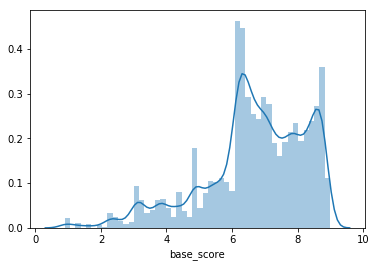

In [16]:
sns.distplot((train['base_score']))

In [46]:
X, y = train[['enc_nod', 'enc_ucd', 'effectiveness_rating','number_of_times_prescribed']], train['base_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestRegressor
import catboost
import lightgbm
import xgboost
import numpy as np

In [25]:
rf = RandomForestRegressor()
cat = catboost.CatBoostRegressor()
cat2 = catboost.CatBoostRegressor()
lgt = lightgbm.LGBMRegressor()

In [26]:
rf.fit(X_train, y_train)
cat.fit(X_train, y_train)
lgt.fit(X_train, y_train)

Learning rate set to 0.067415
0:	learn: 1.5342286	total: 7.37ms	remaining: 7.36s
1:	learn: 1.4882034	total: 12.6ms	remaining: 6.28s
2:	learn: 1.4415214	total: 17.2ms	remaining: 5.71s
3:	learn: 1.4030594	total: 26.7ms	remaining: 6.64s
4:	learn: 1.3632376	total: 31.6ms	remaining: 6.29s
5:	learn: 1.3268999	total: 37.3ms	remaining: 6.18s
6:	learn: 1.2918879	total: 45.6ms	remaining: 6.47s
7:	learn: 1.2573266	total: 51.6ms	remaining: 6.39s
8:	learn: 1.2292561	total: 60.3ms	remaining: 6.64s
9:	learn: 1.2040361	total: 67.4ms	remaining: 6.67s
10:	learn: 1.1758053	total: 73.3ms	remaining: 6.59s
11:	learn: 1.1529553	total: 79.2ms	remaining: 6.52s
12:	learn: 1.1327003	total: 88.3ms	remaining: 6.7s
13:	learn: 1.1110639	total: 95.4ms	remaining: 6.72s
14:	learn: 1.0939904	total: 101ms	remaining: 6.64s
15:	learn: 1.0773496	total: 108ms	remaining: 6.63s
16:	learn: 1.0610984	total: 113ms	remaining: 6.55s
17:	learn: 1.0464867	total: 120ms	remaining: 6.56s
18:	learn: 1.0335474	total: 129ms	remaining: 6.67

179:	learn: 0.4171373	total: 989ms	remaining: 4.5s
180:	learn: 0.4150716	total: 993ms	remaining: 4.5s
181:	learn: 0.4133305	total: 1s	remaining: 4.5s
182:	learn: 0.4129914	total: 1.01s	remaining: 4.49s
183:	learn: 0.4105377	total: 1.01s	remaining: 4.49s
184:	learn: 0.4103240	total: 1.02s	remaining: 4.48s
185:	learn: 0.4077892	total: 1.02s	remaining: 4.47s
186:	learn: 0.4064823	total: 1.03s	remaining: 4.47s
187:	learn: 0.4052534	total: 1.03s	remaining: 4.46s
188:	learn: 0.4029197	total: 1.04s	remaining: 4.45s
189:	learn: 0.4026151	total: 1.04s	remaining: 4.44s
190:	learn: 0.4006535	total: 1.05s	remaining: 4.44s
191:	learn: 0.3995448	total: 1.05s	remaining: 4.43s
192:	learn: 0.3990452	total: 1.06s	remaining: 4.45s
193:	learn: 0.3968606	total: 1.07s	remaining: 4.44s
194:	learn: 0.3964223	total: 1.07s	remaining: 4.44s
195:	learn: 0.3962212	total: 1.08s	remaining: 4.43s
196:	learn: 0.3943368	total: 1.08s	remaining: 4.42s
197:	learn: 0.3931721	total: 1.09s	remaining: 4.41s
198:	learn: 0.3919

345:	learn: 0.2673131	total: 1.81s	remaining: 3.42s
346:	learn: 0.2667011	total: 1.81s	remaining: 3.41s
347:	learn: 0.2665401	total: 1.82s	remaining: 3.41s
348:	learn: 0.2656472	total: 1.82s	remaining: 3.4s
349:	learn: 0.2652484	total: 1.83s	remaining: 3.4s
350:	learn: 0.2645574	total: 1.84s	remaining: 3.4s
351:	learn: 0.2639399	total: 1.84s	remaining: 3.39s
352:	learn: 0.2635165	total: 1.85s	remaining: 3.39s
353:	learn: 0.2628496	total: 1.85s	remaining: 3.38s
354:	learn: 0.2620221	total: 1.86s	remaining: 3.37s
355:	learn: 0.2612508	total: 1.86s	remaining: 3.37s
356:	learn: 0.2610695	total: 1.87s	remaining: 3.36s
357:	learn: 0.2609199	total: 1.87s	remaining: 3.35s
358:	learn: 0.2601211	total: 1.88s	remaining: 3.35s
359:	learn: 0.2599579	total: 1.88s	remaining: 3.34s
360:	learn: 0.2598076	total: 1.89s	remaining: 3.34s
361:	learn: 0.2592174	total: 1.89s	remaining: 3.33s
362:	learn: 0.2588161	total: 1.89s	remaining: 3.33s
363:	learn: 0.2582175	total: 1.9s	remaining: 3.32s
364:	learn: 0.25

533:	learn: 0.1936298	total: 2.81s	remaining: 2.46s
534:	learn: 0.1932715	total: 2.82s	remaining: 2.45s
535:	learn: 0.1931946	total: 2.83s	remaining: 2.44s
536:	learn: 0.1929063	total: 2.83s	remaining: 2.44s
537:	learn: 0.1928293	total: 2.83s	remaining: 2.43s
538:	learn: 0.1924820	total: 2.84s	remaining: 2.43s
539:	learn: 0.1922176	total: 2.85s	remaining: 2.42s
540:	learn: 0.1918182	total: 2.85s	remaining: 2.42s
541:	learn: 0.1914579	total: 2.86s	remaining: 2.42s
542:	learn: 0.1911864	total: 2.86s	remaining: 2.41s
543:	learn: 0.1908660	total: 2.87s	remaining: 2.4s
544:	learn: 0.1907225	total: 2.87s	remaining: 2.4s
545:	learn: 0.1902473	total: 2.88s	remaining: 2.39s
546:	learn: 0.1899586	total: 2.88s	remaining: 2.39s
547:	learn: 0.1898868	total: 2.89s	remaining: 2.38s
548:	learn: 0.1896583	total: 2.89s	remaining: 2.38s
549:	learn: 0.1895901	total: 2.9s	remaining: 2.37s
550:	learn: 0.1892248	total: 2.9s	remaining: 2.36s
551:	learn: 0.1891589	total: 2.9s	remaining: 2.36s
552:	learn: 0.188

700:	learn: 0.1538435	total: 3.64s	remaining: 1.55s
701:	learn: 0.1536296	total: 3.64s	remaining: 1.54s
702:	learn: 0.1533871	total: 3.65s	remaining: 1.54s
703:	learn: 0.1530745	total: 3.65s	remaining: 1.53s
704:	learn: 0.1528686	total: 3.65s	remaining: 1.53s
705:	learn: 0.1526454	total: 3.66s	remaining: 1.52s
706:	learn: 0.1524067	total: 3.67s	remaining: 1.52s
707:	learn: 0.1523159	total: 3.67s	remaining: 1.51s
708:	learn: 0.1521425	total: 3.67s	remaining: 1.51s
709:	learn: 0.1518720	total: 3.68s	remaining: 1.5s
710:	learn: 0.1516940	total: 3.69s	remaining: 1.5s
711:	learn: 0.1515144	total: 3.69s	remaining: 1.49s
712:	learn: 0.1512103	total: 3.69s	remaining: 1.49s
713:	learn: 0.1509557	total: 3.7s	remaining: 1.48s
714:	learn: 0.1508712	total: 3.71s	remaining: 1.48s
715:	learn: 0.1506289	total: 3.71s	remaining: 1.47s
716:	learn: 0.1505497	total: 3.71s	remaining: 1.47s
717:	learn: 0.1504794	total: 3.72s	remaining: 1.46s
718:	learn: 0.1502564	total: 3.72s	remaining: 1.46s
719:	learn: 0.1

873:	learn: 0.1289655	total: 4.46s	remaining: 644ms
874:	learn: 0.1288495	total: 4.47s	remaining: 639ms
875:	learn: 0.1286329	total: 4.47s	remaining: 633ms
876:	learn: 0.1284434	total: 4.48s	remaining: 628ms
877:	learn: 0.1282966	total: 4.48s	remaining: 623ms
878:	learn: 0.1279383	total: 4.49s	remaining: 618ms
879:	learn: 0.1277150	total: 4.5s	remaining: 613ms
880:	learn: 0.1275556	total: 4.5s	remaining: 608ms
881:	learn: 0.1273416	total: 4.5s	remaining: 603ms
882:	learn: 0.1272168	total: 4.51s	remaining: 598ms
883:	learn: 0.1271105	total: 4.51s	remaining: 592ms
884:	learn: 0.1269808	total: 4.52s	remaining: 587ms
885:	learn: 0.1269361	total: 4.52s	remaining: 582ms
886:	learn: 0.1269188	total: 4.53s	remaining: 577ms
887:	learn: 0.1268162	total: 4.53s	remaining: 572ms
888:	learn: 0.1267438	total: 4.54s	remaining: 566ms
889:	learn: 0.1266908	total: 4.54s	remaining: 561ms
890:	learn: 0.1265717	total: 4.54s	remaining: 556ms
891:	learn: 0.1265070	total: 4.55s	remaining: 551ms
892:	learn: 0.1

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [31]:
rf_test = rf.predict((X_train))

In [32]:
cat_test = cat.predict((X_train))

In [33]:
lgt_test = lgt.predict((X_train))

In [34]:
cat

array([7.90079008, 8.48415123, 6.16899233, ..., 3.43306469, 8.56327449,
       6.71052568])

In [35]:
# cat2.fit([rf_test, cat_test, lgt_test], y_test)

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [45]:
def scoring(y_actual, y_predicted):
    rmse = sqrt(mean_squared_error(y_actual, y_predicted))
    score = 100*max(0, 1-rmse)
    return score

In [34]:
scoring(y_test, rf_test)

75.83270486590388

In [35]:
scoring(y_test, cat_test)

85.41962384713237

In [36]:
scoring(y_test, lgt_test)

80.3611667627222

In [37]:
test_pred = cat.predict(test[['enc_nod', 'enc_ucd', 'effectiveness_rating', 'number_of_times_prescribed']])

In [38]:
test['base_score'] = test_pred

In [39]:
test[['patient_id', 'base_score']].to_csv('pred_cat_boost_std.csv', index=False)

# Stacking

In [40]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


rf = RandomForestRegressor()
cat = catboost.CatBoostRegressor()
cat2 = catboost.CatBoostRegressor()
lgt = lightgbm.LGBMRegressor()

stack = StackingCVRegressor(regressors=(rf, cat, lgt),
                            meta_regressor=cat2, 
                            random_state=42,
                            use_features_in_secondary=True)

# grid = GridSearchCV(
#     estimator=stack, 
#     cv=5,
#     refit=True
# )

# grid.fit(X, y)

# print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

In [41]:
stack.fit(X_train, y_train)

Learning rate set to 0.064789
0:	learn: 1.5306182	total: 6.23ms	remaining: 6.22s
1:	learn: 1.4876998	total: 10.4ms	remaining: 5.17s
2:	learn: 1.4430961	total: 14.5ms	remaining: 4.8s
3:	learn: 1.4045383	total: 18.2ms	remaining: 4.53s
4:	learn: 1.3668834	total: 23.4ms	remaining: 4.65s
5:	learn: 1.3299089	total: 27.1ms	remaining: 4.49s
6:	learn: 1.2976181	total: 31.7ms	remaining: 4.49s
7:	learn: 1.2633225	total: 36.2ms	remaining: 4.48s
8:	learn: 1.2364729	total: 41.1ms	remaining: 4.53s
9:	learn: 1.2111333	total: 46ms	remaining: 4.55s
10:	learn: 1.1864919	total: 51.4ms	remaining: 4.62s
11:	learn: 1.1645032	total: 59.2ms	remaining: 4.87s
12:	learn: 1.1447585	total: 63.5ms	remaining: 4.82s
13:	learn: 1.1229111	total: 68ms	remaining: 4.79s
14:	learn: 1.1046206	total: 72.6ms	remaining: 4.77s
15:	learn: 1.0880650	total: 79ms	remaining: 4.86s
16:	learn: 1.0740763	total: 84.4ms	remaining: 4.88s
17:	learn: 1.0602907	total: 88.2ms	remaining: 4.81s
18:	learn: 1.0475213	total: 93ms	remaining: 4.8s
19

179:	learn: 0.4354674	total: 974ms	remaining: 4.44s
180:	learn: 0.4342025	total: 979ms	remaining: 4.43s
181:	learn: 0.4330357	total: 984ms	remaining: 4.42s
182:	learn: 0.4326748	total: 988ms	remaining: 4.41s
183:	learn: 0.4307702	total: 993ms	remaining: 4.4s
184:	learn: 0.4302862	total: 997ms	remaining: 4.39s
185:	learn: 0.4292309	total: 1s	remaining: 4.39s
186:	learn: 0.4270076	total: 1.01s	remaining: 4.4s
187:	learn: 0.4263159	total: 1.02s	remaining: 4.42s
188:	learn: 0.4237447	total: 1.03s	remaining: 4.42s
189:	learn: 0.4224299	total: 1.04s	remaining: 4.42s
190:	learn: 0.4200772	total: 1.05s	remaining: 4.43s
191:	learn: 0.4181093	total: 1.05s	remaining: 4.42s
192:	learn: 0.4177536	total: 1.06s	remaining: 4.42s
193:	learn: 0.4161322	total: 1.06s	remaining: 4.41s
194:	learn: 0.4155879	total: 1.07s	remaining: 4.41s
195:	learn: 0.4152660	total: 1.07s	remaining: 4.4s
196:	learn: 0.4140750	total: 1.08s	remaining: 4.39s
197:	learn: 0.4118363	total: 1.08s	remaining: 4.38s
198:	learn: 0.4115

353:	learn: 0.2739622	total: 1.96s	remaining: 3.58s
354:	learn: 0.2735212	total: 1.96s	remaining: 3.57s
355:	learn: 0.2728470	total: 1.97s	remaining: 3.56s
356:	learn: 0.2721283	total: 1.97s	remaining: 3.55s
357:	learn: 0.2712012	total: 1.98s	remaining: 3.55s
358:	learn: 0.2704679	total: 1.98s	remaining: 3.54s
359:	learn: 0.2696597	total: 1.99s	remaining: 3.53s
360:	learn: 0.2691346	total: 1.99s	remaining: 3.53s
361:	learn: 0.2682356	total: 2s	remaining: 3.52s
362:	learn: 0.2675706	total: 2s	remaining: 3.51s
363:	learn: 0.2668765	total: 2s	remaining: 3.5s
364:	learn: 0.2665676	total: 2.01s	remaining: 3.5s
365:	learn: 0.2659029	total: 2.01s	remaining: 3.49s
366:	learn: 0.2650608	total: 2.02s	remaining: 3.48s
367:	learn: 0.2644087	total: 2.02s	remaining: 3.47s
368:	learn: 0.2638545	total: 2.03s	remaining: 3.47s
369:	learn: 0.2634990	total: 2.03s	remaining: 3.46s
370:	learn: 0.2628243	total: 2.04s	remaining: 3.45s
371:	learn: 0.2621008	total: 2.04s	remaining: 3.44s
372:	learn: 0.2612957	t

519:	learn: 0.2035218	total: 2.77s	remaining: 2.56s
520:	learn: 0.2031388	total: 2.78s	remaining: 2.55s
521:	learn: 0.2028266	total: 2.78s	remaining: 2.55s
522:	learn: 0.2027217	total: 2.79s	remaining: 2.54s
523:	learn: 0.2024836	total: 2.79s	remaining: 2.54s
524:	learn: 0.2023767	total: 2.8s	remaining: 2.53s
525:	learn: 0.2020760	total: 2.8s	remaining: 2.53s
526:	learn: 0.2017139	total: 2.81s	remaining: 2.52s
527:	learn: 0.2012877	total: 2.81s	remaining: 2.51s
528:	learn: 0.2007887	total: 2.82s	remaining: 2.51s
529:	learn: 0.2002574	total: 2.82s	remaining: 2.5s
530:	learn: 0.2001772	total: 2.83s	remaining: 2.5s
531:	learn: 0.1997247	total: 2.83s	remaining: 2.49s
532:	learn: 0.1992947	total: 2.84s	remaining: 2.49s
533:	learn: 0.1988901	total: 2.84s	remaining: 2.48s
534:	learn: 0.1987734	total: 2.85s	remaining: 2.48s
535:	learn: 0.1983474	total: 2.85s	remaining: 2.47s
536:	learn: 0.1978961	total: 2.86s	remaining: 2.46s
537:	learn: 0.1977433	total: 2.86s	remaining: 2.46s
538:	learn: 0.19

707:	learn: 0.1584350	total: 3.75s	remaining: 1.55s
708:	learn: 0.1583556	total: 3.76s	remaining: 1.54s
709:	learn: 0.1581374	total: 3.77s	remaining: 1.54s
710:	learn: 0.1581248	total: 3.77s	remaining: 1.53s
711:	learn: 0.1577832	total: 3.78s	remaining: 1.53s
712:	learn: 0.1576936	total: 3.78s	remaining: 1.52s
713:	learn: 0.1573693	total: 3.79s	remaining: 1.52s
714:	learn: 0.1573574	total: 3.79s	remaining: 1.51s
715:	learn: 0.1573461	total: 3.8s	remaining: 1.5s
716:	learn: 0.1572815	total: 3.8s	remaining: 1.5s
717:	learn: 0.1572011	total: 3.81s	remaining: 1.49s
718:	learn: 0.1571903	total: 3.81s	remaining: 1.49s
719:	learn: 0.1569865	total: 3.81s	remaining: 1.48s
720:	learn: 0.1567981	total: 3.82s	remaining: 1.48s
721:	learn: 0.1565540	total: 3.82s	remaining: 1.47s
722:	learn: 0.1565133	total: 3.83s	remaining: 1.47s
723:	learn: 0.1563127	total: 3.83s	remaining: 1.46s
724:	learn: 0.1560267	total: 3.84s	remaining: 1.46s
725:	learn: 0.1558620	total: 3.84s	remaining: 1.45s
726:	learn: 0.15

873:	learn: 0.1339769	total: 4.57s	remaining: 659ms
874:	learn: 0.1338320	total: 4.58s	remaining: 654ms
875:	learn: 0.1338019	total: 4.58s	remaining: 648ms
876:	learn: 0.1337678	total: 4.58s	remaining: 643ms
877:	learn: 0.1336632	total: 4.59s	remaining: 638ms
878:	learn: 0.1334970	total: 4.59s	remaining: 632ms
879:	learn: 0.1333741	total: 4.6s	remaining: 627ms
880:	learn: 0.1333463	total: 4.6s	remaining: 622ms
881:	learn: 0.1332818	total: 4.61s	remaining: 616ms
882:	learn: 0.1331463	total: 4.61s	remaining: 611ms
883:	learn: 0.1330169	total: 4.62s	remaining: 606ms
884:	learn: 0.1328776	total: 4.62s	remaining: 600ms
885:	learn: 0.1327694	total: 4.62s	remaining: 595ms
886:	learn: 0.1326861	total: 4.63s	remaining: 590ms
887:	learn: 0.1326252	total: 4.63s	remaining: 585ms
888:	learn: 0.1324807	total: 4.64s	remaining: 579ms
889:	learn: 0.1322852	total: 4.64s	remaining: 574ms
890:	learn: 0.1322290	total: 4.65s	remaining: 569ms
891:	learn: 0.1321136	total: 4.65s	remaining: 563ms
892:	learn: 0.

47:	learn: 0.8382030	total: 207ms	remaining: 4.1s
48:	learn: 0.8285353	total: 211ms	remaining: 4.09s
49:	learn: 0.8225144	total: 216ms	remaining: 4.09s
50:	learn: 0.8212031	total: 220ms	remaining: 4.09s
51:	learn: 0.8114063	total: 224ms	remaining: 4.09s
52:	learn: 0.8075950	total: 228ms	remaining: 4.08s
53:	learn: 0.8024857	total: 233ms	remaining: 4.09s
54:	learn: 0.7986197	total: 238ms	remaining: 4.08s
55:	learn: 0.7868622	total: 242ms	remaining: 4.08s
56:	learn: 0.7833140	total: 246ms	remaining: 4.07s
57:	learn: 0.7808800	total: 250ms	remaining: 4.07s
58:	learn: 0.7766443	total: 255ms	remaining: 4.06s
59:	learn: 0.7661923	total: 259ms	remaining: 4.06s
60:	learn: 0.7566148	total: 263ms	remaining: 4.05s
61:	learn: 0.7523919	total: 267ms	remaining: 4.04s
62:	learn: 0.7510609	total: 272ms	remaining: 4.04s
63:	learn: 0.7449188	total: 276ms	remaining: 4.03s
64:	learn: 0.7393332	total: 280ms	remaining: 4.02s
65:	learn: 0.7302021	total: 284ms	remaining: 4.01s
66:	learn: 0.7234668	total: 288m

229:	learn: 0.3682283	total: 1.03s	remaining: 3.44s
230:	learn: 0.3663767	total: 1.03s	remaining: 3.44s
231:	learn: 0.3661248	total: 1.04s	remaining: 3.44s
232:	learn: 0.3642867	total: 1.04s	remaining: 3.43s
233:	learn: 0.3626331	total: 1.05s	remaining: 3.43s
234:	learn: 0.3611343	total: 1.05s	remaining: 3.42s
235:	learn: 0.3595450	total: 1.06s	remaining: 3.42s
236:	learn: 0.3591241	total: 1.06s	remaining: 3.41s
237:	learn: 0.3590193	total: 1.06s	remaining: 3.41s
238:	learn: 0.3586225	total: 1.07s	remaining: 3.4s
239:	learn: 0.3583434	total: 1.07s	remaining: 3.4s
240:	learn: 0.3572296	total: 1.08s	remaining: 3.4s
241:	learn: 0.3565691	total: 1.08s	remaining: 3.39s
242:	learn: 0.3560774	total: 1.09s	remaining: 3.39s
243:	learn: 0.3543395	total: 1.09s	remaining: 3.39s
244:	learn: 0.3535607	total: 1.1s	remaining: 3.38s
245:	learn: 0.3520497	total: 1.1s	remaining: 3.38s
246:	learn: 0.3511074	total: 1.11s	remaining: 3.37s
247:	learn: 0.3497092	total: 1.11s	remaining: 3.37s
248:	learn: 0.348

409:	learn: 0.2449903	total: 1.85s	remaining: 2.66s
410:	learn: 0.2447683	total: 1.85s	remaining: 2.66s
411:	learn: 0.2439937	total: 1.86s	remaining: 2.65s
412:	learn: 0.2431616	total: 1.86s	remaining: 2.65s
413:	learn: 0.2428327	total: 1.87s	remaining: 2.64s
414:	learn: 0.2426617	total: 1.87s	remaining: 2.64s
415:	learn: 0.2422216	total: 1.87s	remaining: 2.63s
416:	learn: 0.2414862	total: 1.88s	remaining: 2.63s
417:	learn: 0.2410592	total: 1.88s	remaining: 2.62s
418:	learn: 0.2403697	total: 1.89s	remaining: 2.62s
419:	learn: 0.2400992	total: 1.89s	remaining: 2.61s
420:	learn: 0.2396360	total: 1.9s	remaining: 2.61s
421:	learn: 0.2388972	total: 1.9s	remaining: 2.6s
422:	learn: 0.2384855	total: 1.91s	remaining: 2.6s
423:	learn: 0.2378899	total: 1.91s	remaining: 2.59s
424:	learn: 0.2373063	total: 1.91s	remaining: 2.59s
425:	learn: 0.2372280	total: 1.92s	remaining: 2.58s
426:	learn: 0.2365264	total: 1.92s	remaining: 2.58s
427:	learn: 0.2361568	total: 1.93s	remaining: 2.58s
428:	learn: 0.23

581:	learn: 0.1877746	total: 2.67s	remaining: 1.92s
582:	learn: 0.1874140	total: 2.67s	remaining: 1.91s
583:	learn: 0.1870572	total: 2.68s	remaining: 1.91s
584:	learn: 0.1869357	total: 2.68s	remaining: 1.9s
585:	learn: 0.1866295	total: 2.69s	remaining: 1.9s
586:	learn: 0.1862350	total: 2.69s	remaining: 1.89s
587:	learn: 0.1858684	total: 2.7s	remaining: 1.89s
588:	learn: 0.1855520	total: 2.7s	remaining: 1.88s
589:	learn: 0.1852146	total: 2.71s	remaining: 1.88s
590:	learn: 0.1847340	total: 2.71s	remaining: 1.88s
591:	learn: 0.1844674	total: 2.71s	remaining: 1.87s
592:	learn: 0.1841316	total: 2.72s	remaining: 1.86s
593:	learn: 0.1838119	total: 2.72s	remaining: 1.86s
594:	learn: 0.1837554	total: 2.73s	remaining: 1.86s
595:	learn: 0.1835076	total: 2.73s	remaining: 1.85s
596:	learn: 0.1832014	total: 2.74s	remaining: 1.85s
597:	learn: 0.1827418	total: 2.74s	remaining: 1.84s
598:	learn: 0.1824170	total: 2.74s	remaining: 1.84s
599:	learn: 0.1821884	total: 2.75s	remaining: 1.83s
600:	learn: 0.18

752:	learn: 0.1500394	total: 3.5s	remaining: 1.15s
753:	learn: 0.1499109	total: 3.5s	remaining: 1.14s
754:	learn: 0.1496686	total: 3.5s	remaining: 1.14s
755:	learn: 0.1494560	total: 3.51s	remaining: 1.13s
756:	learn: 0.1493013	total: 3.51s	remaining: 1.13s
757:	learn: 0.1492240	total: 3.52s	remaining: 1.12s
758:	learn: 0.1490555	total: 3.52s	remaining: 1.12s
759:	learn: 0.1489189	total: 3.53s	remaining: 1.11s
760:	learn: 0.1488583	total: 3.53s	remaining: 1.11s
761:	learn: 0.1486880	total: 3.54s	remaining: 1.1s
762:	learn: 0.1484824	total: 3.54s	remaining: 1.1s
763:	learn: 0.1482335	total: 3.55s	remaining: 1.09s
764:	learn: 0.1480321	total: 3.55s	remaining: 1.09s
765:	learn: 0.1477504	total: 3.56s	remaining: 1.09s
766:	learn: 0.1476504	total: 3.56s	remaining: 1.08s
767:	learn: 0.1476131	total: 3.56s	remaining: 1.08s
768:	learn: 0.1472795	total: 3.57s	remaining: 1.07s
769:	learn: 0.1471949	total: 3.57s	remaining: 1.07s
770:	learn: 0.1469360	total: 3.58s	remaining: 1.06s
771:	learn: 0.146

925:	learn: 0.1263422	total: 4.32s	remaining: 345ms
926:	learn: 0.1262157	total: 4.33s	remaining: 341ms
927:	learn: 0.1261384	total: 4.33s	remaining: 336ms
928:	learn: 0.1259937	total: 4.34s	remaining: 331ms
929:	learn: 0.1259416	total: 4.34s	remaining: 327ms
930:	learn: 0.1257864	total: 4.35s	remaining: 322ms
931:	learn: 0.1256716	total: 4.36s	remaining: 318ms
932:	learn: 0.1255457	total: 4.36s	remaining: 313ms
933:	learn: 0.1254022	total: 4.37s	remaining: 309ms
934:	learn: 0.1252451	total: 4.38s	remaining: 304ms
935:	learn: 0.1250132	total: 4.38s	remaining: 300ms
936:	learn: 0.1248670	total: 4.39s	remaining: 295ms
937:	learn: 0.1246619	total: 4.39s	remaining: 291ms
938:	learn: 0.1242800	total: 4.4s	remaining: 286ms
939:	learn: 0.1240983	total: 4.41s	remaining: 281ms
940:	learn: 0.1239587	total: 4.41s	remaining: 277ms
941:	learn: 0.1239121	total: 4.42s	remaining: 272ms
942:	learn: 0.1237547	total: 4.42s	remaining: 267ms
943:	learn: 0.1235796	total: 4.43s	remaining: 263ms
944:	learn: 0

107:	learn: 0.5855563	total: 516ms	remaining: 4.26s
108:	learn: 0.5840053	total: 520ms	remaining: 4.25s
109:	learn: 0.5812816	total: 525ms	remaining: 4.24s
110:	learn: 0.5807395	total: 530ms	remaining: 4.24s
111:	learn: 0.5782733	total: 534ms	remaining: 4.24s
112:	learn: 0.5735197	total: 540ms	remaining: 4.24s
113:	learn: 0.5696203	total: 545ms	remaining: 4.23s
114:	learn: 0.5671785	total: 550ms	remaining: 4.23s
115:	learn: 0.5653945	total: 554ms	remaining: 4.22s
116:	learn: 0.5640972	total: 559ms	remaining: 4.22s
117:	learn: 0.5635200	total: 564ms	remaining: 4.21s
118:	learn: 0.5609613	total: 569ms	remaining: 4.21s
119:	learn: 0.5601742	total: 573ms	remaining: 4.21s
120:	learn: 0.5590135	total: 578ms	remaining: 4.2s
121:	learn: 0.5586428	total: 582ms	remaining: 4.19s
122:	learn: 0.5578200	total: 587ms	remaining: 4.19s
123:	learn: 0.5539365	total: 592ms	remaining: 4.18s
124:	learn: 0.5504297	total: 597ms	remaining: 4.18s
125:	learn: 0.5461305	total: 602ms	remaining: 4.18s
126:	learn: 0

283:	learn: 0.3273198	total: 1.34s	remaining: 3.38s
284:	learn: 0.3265199	total: 1.35s	remaining: 3.38s
285:	learn: 0.3262759	total: 1.35s	remaining: 3.37s
286:	learn: 0.3248418	total: 1.35s	remaining: 3.36s
287:	learn: 0.3236453	total: 1.36s	remaining: 3.36s
288:	learn: 0.3230945	total: 1.36s	remaining: 3.35s
289:	learn: 0.3224641	total: 1.37s	remaining: 3.35s
290:	learn: 0.3213880	total: 1.37s	remaining: 3.34s
291:	learn: 0.3211509	total: 1.38s	remaining: 3.34s
292:	learn: 0.3209617	total: 1.38s	remaining: 3.33s
293:	learn: 0.3206227	total: 1.39s	remaining: 3.33s
294:	learn: 0.3198452	total: 1.39s	remaining: 3.32s
295:	learn: 0.3193215	total: 1.4s	remaining: 3.32s
296:	learn: 0.3190699	total: 1.4s	remaining: 3.31s
297:	learn: 0.3189511	total: 1.41s	remaining: 3.31s
298:	learn: 0.3176042	total: 1.41s	remaining: 3.31s
299:	learn: 0.3163725	total: 1.41s	remaining: 3.3s
300:	learn: 0.3152306	total: 1.42s	remaining: 3.29s
301:	learn: 0.3147850	total: 1.42s	remaining: 3.29s
302:	learn: 0.3

453:	learn: 0.2317211	total: 2.17s	remaining: 2.6s
454:	learn: 0.2312205	total: 2.17s	remaining: 2.6s
455:	learn: 0.2306053	total: 2.18s	remaining: 2.6s
456:	learn: 0.2300233	total: 2.18s	remaining: 2.59s
457:	learn: 0.2293873	total: 2.19s	remaining: 2.58s
458:	learn: 0.2292304	total: 2.19s	remaining: 2.58s
459:	learn: 0.2288175	total: 2.2s	remaining: 2.59s
460:	learn: 0.2284217	total: 2.21s	remaining: 2.58s
461:	learn: 0.2278579	total: 2.21s	remaining: 2.58s
462:	learn: 0.2273613	total: 2.21s	remaining: 2.57s
463:	learn: 0.2272159	total: 2.22s	remaining: 2.56s
464:	learn: 0.2265429	total: 2.23s	remaining: 2.56s
465:	learn: 0.2261271	total: 2.23s	remaining: 2.56s
466:	learn: 0.2260611	total: 2.23s	remaining: 2.55s
467:	learn: 0.2256503	total: 2.24s	remaining: 2.54s
468:	learn: 0.2251918	total: 2.24s	remaining: 2.54s
469:	learn: 0.2250793	total: 2.25s	remaining: 2.53s
470:	learn: 0.2247650	total: 2.25s	remaining: 2.53s
471:	learn: 0.2243223	total: 2.26s	remaining: 2.52s
472:	learn: 0.22

622:	learn: 0.1775128	total: 2.99s	remaining: 1.81s
623:	learn: 0.1774265	total: 3s	remaining: 1.81s
624:	learn: 0.1773236	total: 3s	remaining: 1.8s
625:	learn: 0.1771557	total: 3.01s	remaining: 1.8s
626:	learn: 0.1770999	total: 3.01s	remaining: 1.79s
627:	learn: 0.1767849	total: 3.02s	remaining: 1.79s
628:	learn: 0.1764166	total: 3.02s	remaining: 1.78s
629:	learn: 0.1761554	total: 3.02s	remaining: 1.77s
630:	learn: 0.1758345	total: 3.03s	remaining: 1.77s
631:	learn: 0.1754938	total: 3.04s	remaining: 1.77s
632:	learn: 0.1750676	total: 3.04s	remaining: 1.76s
633:	learn: 0.1747969	total: 3.05s	remaining: 1.76s
634:	learn: 0.1747436	total: 3.05s	remaining: 1.75s
635:	learn: 0.1744061	total: 3.06s	remaining: 1.75s
636:	learn: 0.1741193	total: 3.06s	remaining: 1.75s
637:	learn: 0.1737539	total: 3.07s	remaining: 1.74s
638:	learn: 0.1735348	total: 3.07s	remaining: 1.73s
639:	learn: 0.1732493	total: 3.08s	remaining: 1.73s
640:	learn: 0.1729667	total: 3.08s	remaining: 1.73s
641:	learn: 0.172766

790:	learn: 0.1473149	total: 3.82s	remaining: 1.01s
791:	learn: 0.1470679	total: 3.83s	remaining: 1s
792:	learn: 0.1468091	total: 3.83s	remaining: 1s
793:	learn: 0.1466063	total: 3.84s	remaining: 996ms
794:	learn: 0.1465417	total: 3.85s	remaining: 992ms
795:	learn: 0.1464467	total: 3.85s	remaining: 987ms
796:	learn: 0.1463826	total: 3.86s	remaining: 982ms
797:	learn: 0.1462774	total: 3.86s	remaining: 977ms
798:	learn: 0.1460885	total: 3.87s	remaining: 973ms
799:	learn: 0.1460408	total: 3.87s	remaining: 968ms
800:	learn: 0.1459855	total: 3.88s	remaining: 963ms
801:	learn: 0.1457698	total: 3.88s	remaining: 959ms
802:	learn: 0.1456054	total: 3.89s	remaining: 954ms
803:	learn: 0.1454097	total: 3.9s	remaining: 950ms
804:	learn: 0.1451178	total: 3.9s	remaining: 945ms
805:	learn: 0.1447394	total: 3.91s	remaining: 941ms
806:	learn: 0.1446174	total: 3.93s	remaining: 939ms
807:	learn: 0.1444673	total: 3.93s	remaining: 934ms
808:	learn: 0.1441193	total: 3.94s	remaining: 929ms
809:	learn: 0.144057

952:	learn: 0.1256040	total: 4.66s	remaining: 230ms
953:	learn: 0.1255409	total: 4.66s	remaining: 225ms
954:	learn: 0.1255149	total: 4.67s	remaining: 220ms
955:	learn: 0.1254239	total: 4.67s	remaining: 215ms
956:	learn: 0.1254086	total: 4.68s	remaining: 210ms
957:	learn: 0.1253581	total: 4.68s	remaining: 205ms
958:	learn: 0.1252574	total: 4.69s	remaining: 201ms
959:	learn: 0.1251345	total: 4.7s	remaining: 196ms
960:	learn: 0.1250394	total: 4.7s	remaining: 191ms
961:	learn: 0.1248882	total: 4.71s	remaining: 186ms
962:	learn: 0.1248264	total: 4.71s	remaining: 181ms
963:	learn: 0.1247382	total: 4.72s	remaining: 176ms
964:	learn: 0.1246780	total: 4.72s	remaining: 171ms
965:	learn: 0.1245633	total: 4.73s	remaining: 166ms
966:	learn: 0.1244792	total: 4.73s	remaining: 162ms
967:	learn: 0.1243806	total: 4.74s	remaining: 157ms
968:	learn: 0.1242824	total: 4.74s	remaining: 152ms
969:	learn: 0.1241523	total: 4.75s	remaining: 147ms
970:	learn: 0.1240490	total: 4.75s	remaining: 142ms
971:	learn: 0.

132:	learn: 0.5206076	total: 673ms	remaining: 4.39s
133:	learn: 0.5180174	total: 678ms	remaining: 4.38s
134:	learn: 0.5149068	total: 682ms	remaining: 4.37s
135:	learn: 0.5115621	total: 688ms	remaining: 4.37s
136:	learn: 0.5092256	total: 693ms	remaining: 4.37s
137:	learn: 0.5055208	total: 698ms	remaining: 4.36s
138:	learn: 0.5049047	total: 703ms	remaining: 4.35s
139:	learn: 0.5027532	total: 707ms	remaining: 4.34s
140:	learn: 0.4993763	total: 712ms	remaining: 4.34s
141:	learn: 0.4978410	total: 716ms	remaining: 4.33s
142:	learn: 0.4950771	total: 721ms	remaining: 4.32s
143:	learn: 0.4927311	total: 725ms	remaining: 4.31s
144:	learn: 0.4897177	total: 730ms	remaining: 4.3s
145:	learn: 0.4883495	total: 735ms	remaining: 4.3s
146:	learn: 0.4857785	total: 739ms	remaining: 4.29s
147:	learn: 0.4853299	total: 743ms	remaining: 4.28s
148:	learn: 0.4824518	total: 748ms	remaining: 4.27s
149:	learn: 0.4798923	total: 752ms	remaining: 4.26s
150:	learn: 0.4794129	total: 757ms	remaining: 4.25s
151:	learn: 0.

293:	learn: 0.3159925	total: 1.49s	remaining: 3.58s
294:	learn: 0.3151817	total: 1.5s	remaining: 3.58s
295:	learn: 0.3149861	total: 1.51s	remaining: 3.58s
296:	learn: 0.3147817	total: 1.51s	remaining: 3.58s
297:	learn: 0.3142038	total: 1.52s	remaining: 3.57s
298:	learn: 0.3139236	total: 1.52s	remaining: 3.57s
299:	learn: 0.3132993	total: 1.52s	remaining: 3.56s
300:	learn: 0.3124060	total: 1.53s	remaining: 3.55s
301:	learn: 0.3110395	total: 1.53s	remaining: 3.55s
302:	learn: 0.3098989	total: 1.54s	remaining: 3.54s
303:	learn: 0.3091369	total: 1.54s	remaining: 3.54s
304:	learn: 0.3085800	total: 1.55s	remaining: 3.53s
305:	learn: 0.3075701	total: 1.55s	remaining: 3.52s
306:	learn: 0.3067791	total: 1.56s	remaining: 3.52s
307:	learn: 0.3057572	total: 1.56s	remaining: 3.51s
308:	learn: 0.3052127	total: 1.57s	remaining: 3.5s
309:	learn: 0.3048264	total: 1.57s	remaining: 3.5s
310:	learn: 0.3036822	total: 1.58s	remaining: 3.49s
311:	learn: 0.3026248	total: 1.58s	remaining: 3.49s
312:	learn: 0.3

455:	learn: 0.2313864	total: 2.32s	remaining: 2.77s
456:	learn: 0.2312120	total: 2.33s	remaining: 2.76s
457:	learn: 0.2309002	total: 2.33s	remaining: 2.76s
458:	learn: 0.2303859	total: 2.34s	remaining: 2.75s
459:	learn: 0.2300943	total: 2.34s	remaining: 2.75s
460:	learn: 0.2300464	total: 2.35s	remaining: 2.75s
461:	learn: 0.2299221	total: 2.35s	remaining: 2.74s
462:	learn: 0.2292810	total: 2.36s	remaining: 2.74s
463:	learn: 0.2291545	total: 2.36s	remaining: 2.73s
464:	learn: 0.2286571	total: 2.37s	remaining: 2.73s
465:	learn: 0.2286157	total: 2.38s	remaining: 2.73s
466:	learn: 0.2281375	total: 2.38s	remaining: 2.72s
467:	learn: 0.2278260	total: 2.39s	remaining: 2.72s
468:	learn: 0.2272791	total: 2.4s	remaining: 2.71s
469:	learn: 0.2271262	total: 2.4s	remaining: 2.71s
470:	learn: 0.2269037	total: 2.41s	remaining: 2.7s
471:	learn: 0.2267971	total: 2.41s	remaining: 2.7s
472:	learn: 0.2267538	total: 2.42s	remaining: 2.69s
473:	learn: 0.2266305	total: 2.42s	remaining: 2.69s
474:	learn: 0.22

637:	learn: 0.1795974	total: 3.31s	remaining: 1.88s
638:	learn: 0.1795485	total: 3.32s	remaining: 1.87s
639:	learn: 0.1794589	total: 3.32s	remaining: 1.87s
640:	learn: 0.1792649	total: 3.33s	remaining: 1.86s
641:	learn: 0.1792534	total: 3.33s	remaining: 1.86s
642:	learn: 0.1789468	total: 3.33s	remaining: 1.85s
643:	learn: 0.1789158	total: 3.34s	remaining: 1.85s
644:	learn: 0.1785041	total: 3.34s	remaining: 1.84s
645:	learn: 0.1781212	total: 3.35s	remaining: 1.83s
646:	learn: 0.1780251	total: 3.35s	remaining: 1.83s
647:	learn: 0.1778903	total: 3.36s	remaining: 1.82s
648:	learn: 0.1774643	total: 3.36s	remaining: 1.82s
649:	learn: 0.1773340	total: 3.37s	remaining: 1.81s
650:	learn: 0.1770597	total: 3.37s	remaining: 1.81s
651:	learn: 0.1766694	total: 3.38s	remaining: 1.8s
652:	learn: 0.1765053	total: 3.38s	remaining: 1.8s
653:	learn: 0.1764518	total: 3.39s	remaining: 1.79s
654:	learn: 0.1761345	total: 3.39s	remaining: 1.79s
655:	learn: 0.1758015	total: 3.4s	remaining: 1.78s
656:	learn: 0.1

809:	learn: 0.1454531	total: 4.14s	remaining: 971ms
810:	learn: 0.1451395	total: 4.14s	remaining: 966ms
811:	learn: 0.1450026	total: 4.15s	remaining: 961ms
812:	learn: 0.1448127	total: 4.15s	remaining: 956ms
813:	learn: 0.1446476	total: 4.16s	remaining: 950ms
814:	learn: 0.1445365	total: 4.16s	remaining: 945ms
815:	learn: 0.1443615	total: 4.17s	remaining: 940ms
816:	learn: 0.1442272	total: 4.17s	remaining: 935ms
817:	learn: 0.1440398	total: 4.18s	remaining: 930ms
818:	learn: 0.1439597	total: 4.18s	remaining: 924ms
819:	learn: 0.1437710	total: 4.19s	remaining: 919ms
820:	learn: 0.1436004	total: 4.19s	remaining: 914ms
821:	learn: 0.1435523	total: 4.2s	remaining: 909ms
822:	learn: 0.1434592	total: 4.2s	remaining: 903ms
823:	learn: 0.1433113	total: 4.21s	remaining: 898ms
824:	learn: 0.1432419	total: 4.21s	remaining: 893ms
825:	learn: 0.1432170	total: 4.21s	remaining: 888ms
826:	learn: 0.1429928	total: 4.22s	remaining: 883ms
827:	learn: 0.1428415	total: 4.22s	remaining: 877ms
828:	learn: 0.

971:	learn: 0.1233592	total: 4.96s	remaining: 143ms
972:	learn: 0.1232587	total: 4.96s	remaining: 138ms
973:	learn: 0.1232424	total: 4.97s	remaining: 133ms
974:	learn: 0.1231263	total: 4.97s	remaining: 128ms
975:	learn: 0.1230163	total: 4.98s	remaining: 122ms
976:	learn: 0.1228706	total: 4.99s	remaining: 117ms
977:	learn: 0.1227255	total: 4.99s	remaining: 112ms
978:	learn: 0.1225830	total: 4.99s	remaining: 107ms
979:	learn: 0.1225026	total: 5s	remaining: 102ms
980:	learn: 0.1223752	total: 5s	remaining: 96.9ms
981:	learn: 0.1222357	total: 5.01s	remaining: 91.9ms
982:	learn: 0.1221360	total: 5.02s	remaining: 86.8ms
983:	learn: 0.1219900	total: 5.03s	remaining: 81.7ms
984:	learn: 0.1218902	total: 5.03s	remaining: 76.6ms
985:	learn: 0.1217560	total: 5.03s	remaining: 71.5ms
986:	learn: 0.1215124	total: 5.04s	remaining: 66.4ms
987:	learn: 0.1214415	total: 5.05s	remaining: 61.3ms
988:	learn: 0.1213578	total: 5.05s	remaining: 56.2ms
989:	learn: 0.1212822	total: 5.06s	remaining: 51.1ms
990:	lea

150:	learn: 0.4905857	total: 820ms	remaining: 4.61s
151:	learn: 0.4897502	total: 824ms	remaining: 4.6s
152:	learn: 0.4885270	total: 829ms	remaining: 4.59s
153:	learn: 0.4855809	total: 834ms	remaining: 4.58s
154:	learn: 0.4823201	total: 839ms	remaining: 4.57s
155:	learn: 0.4802084	total: 845ms	remaining: 4.57s
156:	learn: 0.4785653	total: 850ms	remaining: 4.57s
157:	learn: 0.4778082	total: 856ms	remaining: 4.56s
158:	learn: 0.4775696	total: 860ms	remaining: 4.55s
159:	learn: 0.4742853	total: 865ms	remaining: 4.54s
160:	learn: 0.4722226	total: 870ms	remaining: 4.53s
161:	learn: 0.4690670	total: 874ms	remaining: 4.52s
162:	learn: 0.4658603	total: 880ms	remaining: 4.52s
163:	learn: 0.4655846	total: 885ms	remaining: 4.51s
164:	learn: 0.4639783	total: 889ms	remaining: 4.5s
165:	learn: 0.4612406	total: 894ms	remaining: 4.49s
166:	learn: 0.4604533	total: 900ms	remaining: 4.49s
167:	learn: 0.4596692	total: 904ms	remaining: 4.48s
168:	learn: 0.4576810	total: 910ms	remaining: 4.47s
169:	learn: 0.

336:	learn: 0.2849795	total: 1.81s	remaining: 3.56s
337:	learn: 0.2844133	total: 1.81s	remaining: 3.55s
338:	learn: 0.2834303	total: 1.82s	remaining: 3.54s
339:	learn: 0.2824254	total: 1.82s	remaining: 3.54s
340:	learn: 0.2815196	total: 1.83s	remaining: 3.53s
341:	learn: 0.2805373	total: 1.83s	remaining: 3.53s
342:	learn: 0.2803786	total: 1.84s	remaining: 3.52s
343:	learn: 0.2803046	total: 1.84s	remaining: 3.52s
344:	learn: 0.2799550	total: 1.85s	remaining: 3.51s
345:	learn: 0.2796735	total: 1.85s	remaining: 3.5s
346:	learn: 0.2787979	total: 1.86s	remaining: 3.5s
347:	learn: 0.2779803	total: 1.86s	remaining: 3.49s
348:	learn: 0.2772111	total: 1.87s	remaining: 3.48s
349:	learn: 0.2764294	total: 1.87s	remaining: 3.48s
350:	learn: 0.2756769	total: 1.88s	remaining: 3.47s
351:	learn: 0.2755665	total: 1.88s	remaining: 3.46s
352:	learn: 0.2747959	total: 1.89s	remaining: 3.46s
353:	learn: 0.2744785	total: 1.89s	remaining: 3.45s
354:	learn: 0.2743299	total: 1.9s	remaining: 3.45s
355:	learn: 0.2

496:	learn: 0.2136393	total: 2.63s	remaining: 2.66s
497:	learn: 0.2132082	total: 2.64s	remaining: 2.66s
498:	learn: 0.2130968	total: 2.64s	remaining: 2.65s
499:	learn: 0.2126097	total: 2.65s	remaining: 2.65s
500:	learn: 0.2123347	total: 2.66s	remaining: 2.65s
501:	learn: 0.2119509	total: 2.66s	remaining: 2.64s
502:	learn: 0.2118147	total: 2.67s	remaining: 2.63s
503:	learn: 0.2114745	total: 2.67s	remaining: 2.63s
504:	learn: 0.2110353	total: 2.68s	remaining: 2.63s
505:	learn: 0.2109011	total: 2.68s	remaining: 2.62s
506:	learn: 0.2105364	total: 2.69s	remaining: 2.61s
507:	learn: 0.2100074	total: 2.69s	remaining: 2.61s
508:	learn: 0.2094108	total: 2.7s	remaining: 2.6s
509:	learn: 0.2091170	total: 2.7s	remaining: 2.6s
510:	learn: 0.2089851	total: 2.71s	remaining: 2.59s
511:	learn: 0.2087976	total: 2.71s	remaining: 2.59s
512:	learn: 0.2086693	total: 2.72s	remaining: 2.58s
513:	learn: 0.2082362	total: 2.72s	remaining: 2.58s
514:	learn: 0.2079450	total: 2.73s	remaining: 2.57s
515:	learn: 0.20

669:	learn: 0.1655472	total: 3.46s	remaining: 1.7s
670:	learn: 0.1653382	total: 3.46s	remaining: 1.7s
671:	learn: 0.1651677	total: 3.47s	remaining: 1.69s
672:	learn: 0.1648491	total: 3.47s	remaining: 1.69s
673:	learn: 0.1646213	total: 3.48s	remaining: 1.68s
674:	learn: 0.1644049	total: 3.48s	remaining: 1.68s
675:	learn: 0.1641353	total: 3.49s	remaining: 1.67s
676:	learn: 0.1639302	total: 3.49s	remaining: 1.67s
677:	learn: 0.1638762	total: 3.5s	remaining: 1.66s
678:	learn: 0.1636894	total: 3.5s	remaining: 1.66s
679:	learn: 0.1635890	total: 3.5s	remaining: 1.65s
680:	learn: 0.1635035	total: 3.51s	remaining: 1.64s
681:	learn: 0.1633922	total: 3.51s	remaining: 1.64s
682:	learn: 0.1630304	total: 3.52s	remaining: 1.63s
683:	learn: 0.1628180	total: 3.52s	remaining: 1.63s
684:	learn: 0.1625999	total: 3.53s	remaining: 1.62s
685:	learn: 0.1624702	total: 3.53s	remaining: 1.62s
686:	learn: 0.1622872	total: 3.54s	remaining: 1.61s
687:	learn: 0.1620473	total: 3.54s	remaining: 1.6s
688:	learn: 0.1620

843:	learn: 0.1377804	total: 4.29s	remaining: 793ms
844:	learn: 0.1377171	total: 4.29s	remaining: 787ms
845:	learn: 0.1376496	total: 4.3s	remaining: 782ms
846:	learn: 0.1375951	total: 4.3s	remaining: 777ms
847:	learn: 0.1374017	total: 4.31s	remaining: 772ms
848:	learn: 0.1372755	total: 4.31s	remaining: 767ms
849:	learn: 0.1371135	total: 4.32s	remaining: 762ms
850:	learn: 0.1369427	total: 4.32s	remaining: 757ms
851:	learn: 0.1368195	total: 4.33s	remaining: 751ms
852:	learn: 0.1366599	total: 4.33s	remaining: 746ms
853:	learn: 0.1365390	total: 4.33s	remaining: 741ms
854:	learn: 0.1364307	total: 4.34s	remaining: 736ms
855:	learn: 0.1362631	total: 4.34s	remaining: 731ms
856:	learn: 0.1361078	total: 4.35s	remaining: 726ms
857:	learn: 0.1359536	total: 4.35s	remaining: 721ms
858:	learn: 0.1357862	total: 4.36s	remaining: 715ms
859:	learn: 0.1355917	total: 4.36s	remaining: 710ms
860:	learn: 0.1355025	total: 4.37s	remaining: 705ms
861:	learn: 0.1353586	total: 4.37s	remaining: 700ms
862:	learn: 0.

25:	learn: 0.3304996	total: 157ms	remaining: 5.9s
26:	learn: 0.3144323	total: 163ms	remaining: 5.86s
27:	learn: 0.2992124	total: 168ms	remaining: 5.85s
28:	learn: 0.2855745	total: 176ms	remaining: 5.9s
29:	learn: 0.2728265	total: 183ms	remaining: 5.92s
30:	learn: 0.2612942	total: 188ms	remaining: 5.88s
31:	learn: 0.2509106	total: 193ms	remaining: 5.84s
32:	learn: 0.2408646	total: 199ms	remaining: 5.82s
33:	learn: 0.2321380	total: 205ms	remaining: 5.83s
34:	learn: 0.2239807	total: 221ms	remaining: 6.08s
35:	learn: 0.2163363	total: 226ms	remaining: 6.05s
36:	learn: 0.2093898	total: 232ms	remaining: 6.04s
37:	learn: 0.2028771	total: 237ms	remaining: 6s
38:	learn: 0.1969433	total: 242ms	remaining: 5.97s
39:	learn: 0.1914222	total: 247ms	remaining: 5.93s
40:	learn: 0.1864179	total: 252ms	remaining: 5.9s
41:	learn: 0.1816951	total: 258ms	remaining: 5.88s
42:	learn: 0.1775374	total: 263ms	remaining: 5.85s
43:	learn: 0.1735846	total: 269ms	remaining: 5.84s
44:	learn: 0.1700967	total: 275ms	rem

190:	learn: 0.0974540	total: 1.16s	remaining: 4.93s
191:	learn: 0.0972079	total: 1.17s	remaining: 4.92s
192:	learn: 0.0969576	total: 1.17s	remaining: 4.91s
193:	learn: 0.0966911	total: 1.18s	remaining: 4.9s
194:	learn: 0.0965037	total: 1.19s	remaining: 4.89s
195:	learn: 0.0962971	total: 1.19s	remaining: 4.88s
196:	learn: 0.0959531	total: 1.2s	remaining: 4.87s
197:	learn: 0.0956530	total: 1.2s	remaining: 4.86s
198:	learn: 0.0953546	total: 1.21s	remaining: 4.85s
199:	learn: 0.0951037	total: 1.21s	remaining: 4.84s
200:	learn: 0.0949529	total: 1.22s	remaining: 4.84s
201:	learn: 0.0948124	total: 1.22s	remaining: 4.83s
202:	learn: 0.0946868	total: 1.23s	remaining: 4.82s
203:	learn: 0.0944550	total: 1.23s	remaining: 4.81s
204:	learn: 0.0943571	total: 1.24s	remaining: 4.8s
205:	learn: 0.0940592	total: 1.24s	remaining: 4.79s
206:	learn: 0.0939390	total: 1.25s	remaining: 4.78s
207:	learn: 0.0936680	total: 1.25s	remaining: 4.77s
208:	learn: 0.0935303	total: 1.26s	remaining: 4.76s
209:	learn: 0.09

375:	learn: 0.0723316	total: 2.17s	remaining: 3.6s
376:	learn: 0.0722727	total: 2.17s	remaining: 3.59s
377:	learn: 0.0722694	total: 2.19s	remaining: 3.61s
378:	learn: 0.0721876	total: 2.2s	remaining: 3.6s
379:	learn: 0.0721236	total: 2.2s	remaining: 3.59s
380:	learn: 0.0721204	total: 2.21s	remaining: 3.58s
381:	learn: 0.0721167	total: 2.21s	remaining: 3.58s
382:	learn: 0.0720093	total: 2.21s	remaining: 3.57s
383:	learn: 0.0718807	total: 2.22s	remaining: 3.56s
384:	learn: 0.0718488	total: 2.23s	remaining: 3.56s
385:	learn: 0.0716616	total: 2.23s	remaining: 3.55s
386:	learn: 0.0716587	total: 2.24s	remaining: 3.55s
387:	learn: 0.0715806	total: 2.25s	remaining: 3.54s
388:	learn: 0.0715763	total: 2.25s	remaining: 3.54s
389:	learn: 0.0714393	total: 2.26s	remaining: 3.54s
390:	learn: 0.0714366	total: 2.27s	remaining: 3.53s
391:	learn: 0.0714340	total: 2.27s	remaining: 3.53s
392:	learn: 0.0713627	total: 2.28s	remaining: 3.52s
393:	learn: 0.0711988	total: 2.29s	remaining: 3.52s
394:	learn: 0.07

549:	learn: 0.0596075	total: 3.35s	remaining: 2.74s
550:	learn: 0.0595395	total: 3.36s	remaining: 2.74s
551:	learn: 0.0594283	total: 3.36s	remaining: 2.73s
552:	learn: 0.0593861	total: 3.37s	remaining: 2.72s
553:	learn: 0.0593714	total: 3.38s	remaining: 2.72s
554:	learn: 0.0592787	total: 3.38s	remaining: 2.71s
555:	learn: 0.0591867	total: 3.39s	remaining: 2.7s
556:	learn: 0.0591227	total: 3.39s	remaining: 2.7s
557:	learn: 0.0590303	total: 3.4s	remaining: 2.69s
558:	learn: 0.0589734	total: 3.4s	remaining: 2.68s
559:	learn: 0.0588577	total: 3.41s	remaining: 2.68s
560:	learn: 0.0587944	total: 3.42s	remaining: 2.67s
561:	learn: 0.0587296	total: 3.42s	remaining: 2.67s
562:	learn: 0.0586593	total: 3.43s	remaining: 2.66s
563:	learn: 0.0586183	total: 3.43s	remaining: 2.65s
564:	learn: 0.0585492	total: 3.44s	remaining: 2.65s
565:	learn: 0.0585145	total: 3.45s	remaining: 2.64s
566:	learn: 0.0584680	total: 3.45s	remaining: 2.64s
567:	learn: 0.0583824	total: 3.46s	remaining: 2.63s
568:	learn: 0.05

730:	learn: 0.0500612	total: 4.52s	remaining: 1.66s
731:	learn: 0.0500080	total: 4.53s	remaining: 1.66s
732:	learn: 0.0499507	total: 4.53s	remaining: 1.65s
733:	learn: 0.0498996	total: 4.54s	remaining: 1.64s
734:	learn: 0.0498502	total: 4.54s	remaining: 1.64s
735:	learn: 0.0497737	total: 4.55s	remaining: 1.63s
736:	learn: 0.0496915	total: 4.55s	remaining: 1.63s
737:	learn: 0.0496671	total: 4.56s	remaining: 1.62s
738:	learn: 0.0496135	total: 4.57s	remaining: 1.61s
739:	learn: 0.0495657	total: 4.57s	remaining: 1.61s
740:	learn: 0.0495336	total: 4.58s	remaining: 1.6s
741:	learn: 0.0494940	total: 4.59s	remaining: 1.59s
742:	learn: 0.0494657	total: 4.59s	remaining: 1.59s
743:	learn: 0.0493919	total: 4.6s	remaining: 1.58s
744:	learn: 0.0493603	total: 4.6s	remaining: 1.58s
745:	learn: 0.0493261	total: 4.61s	remaining: 1.57s
746:	learn: 0.0492757	total: 4.62s	remaining: 1.56s
747:	learn: 0.0492489	total: 4.62s	remaining: 1.56s
748:	learn: 0.0492314	total: 4.63s	remaining: 1.55s
749:	learn: 0.0

897:	learn: 0.0432157	total: 5.69s	remaining: 647ms
898:	learn: 0.0431844	total: 5.7s	remaining: 640ms
899:	learn: 0.0431552	total: 5.71s	remaining: 634ms
900:	learn: 0.0431381	total: 5.71s	remaining: 627ms
901:	learn: 0.0431165	total: 5.72s	remaining: 621ms
902:	learn: 0.0430645	total: 5.73s	remaining: 615ms
903:	learn: 0.0430223	total: 5.73s	remaining: 609ms
904:	learn: 0.0429970	total: 5.74s	remaining: 603ms
905:	learn: 0.0429143	total: 5.75s	remaining: 596ms
906:	learn: 0.0428979	total: 5.75s	remaining: 590ms
907:	learn: 0.0428774	total: 5.76s	remaining: 584ms
908:	learn: 0.0428401	total: 5.77s	remaining: 578ms
909:	learn: 0.0428101	total: 5.78s	remaining: 571ms
910:	learn: 0.0427840	total: 5.78s	remaining: 565ms
911:	learn: 0.0427602	total: 5.79s	remaining: 558ms
912:	learn: 0.0427005	total: 5.79s	remaining: 552ms
913:	learn: 0.0426700	total: 5.8s	remaining: 546ms
914:	learn: 0.0426387	total: 5.8s	remaining: 539ms
915:	learn: 0.0426218	total: 5.81s	remaining: 533ms
916:	learn: 0.0

72:	learn: 0.7043191	total: 511ms	remaining: 6.49s
73:	learn: 0.7002687	total: 519ms	remaining: 6.5s
74:	learn: 0.6913928	total: 529ms	remaining: 6.52s
75:	learn: 0.6882647	total: 551ms	remaining: 6.7s
76:	learn: 0.6874329	total: 560ms	remaining: 6.71s
77:	learn: 0.6816048	total: 576ms	remaining: 6.8s
78:	learn: 0.6778128	total: 598ms	remaining: 6.98s
79:	learn: 0.6769282	total: 623ms	remaining: 7.17s
80:	learn: 0.6684268	total: 650ms	remaining: 7.38s
81:	learn: 0.6662009	total: 658ms	remaining: 7.37s
82:	learn: 0.6596212	total: 687ms	remaining: 7.59s
83:	learn: 0.6573828	total: 701ms	remaining: 7.65s
84:	learn: 0.6568191	total: 708ms	remaining: 7.63s
85:	learn: 0.6551494	total: 715ms	remaining: 7.6s
86:	learn: 0.6528319	total: 743ms	remaining: 7.79s
87:	learn: 0.6447617	total: 749ms	remaining: 7.76s
88:	learn: 0.6392988	total: 755ms	remaining: 7.73s
89:	learn: 0.6387753	total: 762ms	remaining: 7.7s
90:	learn: 0.6342410	total: 767ms	remaining: 7.66s
91:	learn: 0.6326530	total: 789ms	re

242:	learn: 0.3402792	total: 1.7s	remaining: 5.29s
243:	learn: 0.3397922	total: 1.7s	remaining: 5.28s
244:	learn: 0.3393560	total: 1.71s	remaining: 5.26s
245:	learn: 0.3378795	total: 1.71s	remaining: 5.25s
246:	learn: 0.3367550	total: 1.72s	remaining: 5.25s
247:	learn: 0.3354369	total: 1.73s	remaining: 5.24s
248:	learn: 0.3344952	total: 1.73s	remaining: 5.23s
249:	learn: 0.3333368	total: 1.74s	remaining: 5.22s
250:	learn: 0.3321241	total: 1.75s	remaining: 5.22s
251:	learn: 0.3312130	total: 1.75s	remaining: 5.21s
252:	learn: 0.3303660	total: 1.76s	remaining: 5.19s
253:	learn: 0.3291534	total: 1.76s	remaining: 5.18s
254:	learn: 0.3279875	total: 1.77s	remaining: 5.17s
255:	learn: 0.3267853	total: 1.77s	remaining: 5.16s
256:	learn: 0.3255345	total: 1.78s	remaining: 5.15s
257:	learn: 0.3246802	total: 1.78s	remaining: 5.13s
258:	learn: 0.3244480	total: 1.79s	remaining: 5.12s
259:	learn: 0.3232427	total: 1.79s	remaining: 5.11s
260:	learn: 0.3230031	total: 1.8s	remaining: 5.1s
261:	learn: 0.32

408:	learn: 0.2354734	total: 2.91s	remaining: 4.2s
409:	learn: 0.2353671	total: 2.92s	remaining: 4.2s
410:	learn: 0.2348653	total: 2.92s	remaining: 4.19s
411:	learn: 0.2341903	total: 2.94s	remaining: 4.2s
412:	learn: 0.2336348	total: 2.95s	remaining: 4.19s
413:	learn: 0.2331116	total: 2.95s	remaining: 4.18s
414:	learn: 0.2324890	total: 2.96s	remaining: 4.17s
415:	learn: 0.2323986	total: 2.97s	remaining: 4.17s
416:	learn: 0.2322193	total: 2.98s	remaining: 4.17s
417:	learn: 0.2317482	total: 2.99s	remaining: 4.16s
418:	learn: 0.2313778	total: 3s	remaining: 4.15s
419:	learn: 0.2312449	total: 3s	remaining: 4.15s
420:	learn: 0.2306546	total: 3.01s	remaining: 4.14s
421:	learn: 0.2301904	total: 3.02s	remaining: 4.13s
422:	learn: 0.2297585	total: 3.02s	remaining: 4.13s
423:	learn: 0.2291797	total: 3.03s	remaining: 4.12s
424:	learn: 0.2290675	total: 3.04s	remaining: 4.11s
425:	learn: 0.2290440	total: 3.05s	remaining: 4.1s
426:	learn: 0.2284480	total: 3.05s	remaining: 4.09s
427:	learn: 0.2278080	

578:	learn: 0.1812716	total: 4.23s	remaining: 3.08s
579:	learn: 0.1810671	total: 4.24s	remaining: 3.07s
580:	learn: 0.1807456	total: 4.25s	remaining: 3.06s
581:	learn: 0.1805760	total: 4.25s	remaining: 3.05s
582:	learn: 0.1803914	total: 4.25s	remaining: 3.04s
583:	learn: 0.1799791	total: 4.26s	remaining: 3.04s
584:	learn: 0.1798491	total: 4.27s	remaining: 3.03s
585:	learn: 0.1792870	total: 4.28s	remaining: 3.02s
586:	learn: 0.1789955	total: 4.28s	remaining: 3.01s
587:	learn: 0.1786489	total: 4.29s	remaining: 3s
588:	learn: 0.1783077	total: 4.29s	remaining: 2.99s
589:	learn: 0.1782243	total: 4.3s	remaining: 2.99s
590:	learn: 0.1780910	total: 4.31s	remaining: 2.98s
591:	learn: 0.1780141	total: 4.31s	remaining: 2.97s
592:	learn: 0.1775180	total: 4.32s	remaining: 2.97s
593:	learn: 0.1772488	total: 4.33s	remaining: 2.96s
594:	learn: 0.1769294	total: 4.34s	remaining: 2.95s
595:	learn: 0.1766437	total: 4.34s	remaining: 2.94s
596:	learn: 0.1763343	total: 4.35s	remaining: 2.93s
597:	learn: 0.17

745:	learn: 0.1468510	total: 5.79s	remaining: 1.97s
746:	learn: 0.1466342	total: 5.8s	remaining: 1.96s
747:	learn: 0.1464939	total: 5.81s	remaining: 1.96s
748:	learn: 0.1462839	total: 5.81s	remaining: 1.95s
749:	learn: 0.1460990	total: 5.83s	remaining: 1.94s
750:	learn: 0.1458977	total: 5.84s	remaining: 1.94s
751:	learn: 0.1457350	total: 5.84s	remaining: 1.93s
752:	learn: 0.1453282	total: 5.85s	remaining: 1.92s
753:	learn: 0.1451108	total: 5.86s	remaining: 1.91s
754:	learn: 0.1449458	total: 5.86s	remaining: 1.9s
755:	learn: 0.1447582	total: 5.87s	remaining: 1.89s
756:	learn: 0.1447070	total: 5.88s	remaining: 1.89s
757:	learn: 0.1445273	total: 5.88s	remaining: 1.88s
758:	learn: 0.1443620	total: 5.9s	remaining: 1.87s
759:	learn: 0.1443255	total: 5.9s	remaining: 1.86s
760:	learn: 0.1442555	total: 5.91s	remaining: 1.85s
761:	learn: 0.1441700	total: 5.91s	remaining: 1.85s
762:	learn: 0.1441063	total: 5.92s	remaining: 1.84s
763:	learn: 0.1439539	total: 5.93s	remaining: 1.83s
764:	learn: 0.14

906:	learn: 0.1245533	total: 7.2s	remaining: 738ms
907:	learn: 0.1245120	total: 7.21s	remaining: 730ms
908:	learn: 0.1244553	total: 7.21s	remaining: 722ms
909:	learn: 0.1243069	total: 7.22s	remaining: 714ms
910:	learn: 0.1241550	total: 7.22s	remaining: 706ms
911:	learn: 0.1239764	total: 7.23s	remaining: 697ms
912:	learn: 0.1238890	total: 7.23s	remaining: 689ms
913:	learn: 0.1237834	total: 7.24s	remaining: 681ms
914:	learn: 0.1236413	total: 7.25s	remaining: 673ms
915:	learn: 0.1235098	total: 7.25s	remaining: 665ms
916:	learn: 0.1234431	total: 7.26s	remaining: 657ms
917:	learn: 0.1233385	total: 7.27s	remaining: 649ms
918:	learn: 0.1232215	total: 7.27s	remaining: 641ms
919:	learn: 0.1230659	total: 7.28s	remaining: 633ms
920:	learn: 0.1229311	total: 7.28s	remaining: 625ms
921:	learn: 0.1227986	total: 7.29s	remaining: 617ms
922:	learn: 0.1226562	total: 7.29s	remaining: 609ms
923:	learn: 0.1226076	total: 7.3s	remaining: 601ms
924:	learn: 0.1223979	total: 7.31s	remaining: 592ms
925:	learn: 0.

StackingCVRegressor(cv=5,
                    meta_regressor=<catboost.core.CatBoostRegressor object at 0x000001C3B6A5CDA0>,
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=42,
                    refit=True,
                    regressors=(RandomForestRegressor(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impuri...
                                              learning_rate=0.1, max_depth=-1,
                                      

In [47]:
y_pred = stack.predict(X_test)

In [49]:
scoring(y_test, y_pred)

90.73928363703997

In [52]:
test_pred = stack.predict(test[['enc_nod', 'enc_ucd', 'effectiveness_rating', 'number_of_times_prescribed']])

In [53]:
test['base_score'] = test_pred
test[['patient_id', 'base_score']].to_csv('stacked_regress.csv', index=False)